In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [72]:
f = open("output.csv")
print f.readline()
d = np.loadtxt(f, delimiter=",", usecols = (0, 1, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18))

Index,Rank,Song,Artist,Year,Lyrics,ids,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence



**The columns in d correspond to the following vals:**
* col 0 = index
* col 1 = rank in year
* col 2 = year
* col 3 = energy
* col 4 = liveness
* col 5 = tempo
* col 6 = speechiness 
* col 7 = acousticness
* col 8 = instrumentalness
* col 9 = time sig
* col 10 = danceability
* col 11 = key
* col 12 = duration
* col 13 = loudness
* col 14 = valence

In [40]:
d1 = pd.DataFrame(data=d)
print d1.describe()

                0            1            2            3            4   \
count  1594.000000  1594.000000  1594.000000  1594.000000  1594.000000   
mean    800.833752    50.453576  2007.513802     0.686577     0.174070   
std     462.225967    28.878526     4.612968     0.165548     0.131940   
min       0.000000     1.000000  2000.000000     0.016400     0.021000   
25%     401.250000    25.250000  2004.000000     0.583000     0.091325   
50%     802.500000    50.000000  2008.000000     0.708000     0.121000   
75%    1200.750000    75.000000  2012.000000     0.810750     0.217000   
max    1599.000000   100.000000  2015.000000     0.989000     0.854000   

                5            6            7            8            9   \
count  1594.000000  1594.000000  1594.000000  1594.000000  1594.000000   
mean    120.962718     0.098523     0.164470     0.009851     3.981807   
std      28.969335     0.094483     0.206832     0.071802     0.240934   
min      57.107000     0.023600     0

** THE FOLLOWING CODE USES A TRAIN-TEST SPLIT TO ACCOUNT FOR POSSIBLE OVERFITTING OF THE MODEL. THE CODE REPRESENTS MULTI-FEATURE LEAST SQUARES REGRESSION USING A TRAIN-TEST SPLIT OF 0.8/0.2 **

In [47]:
y = pd.DataFrame(data=d1, columns=[1]) # rank on y 
multiX = pd.DataFrame(data=d1, columns=[3, 10, 13]) # energy, danceability, loudness

X_train, X_test, y_train, y_test = train_test_split(multiX, y, test_size=0.2)
multiTrend = sm.OLS(y_train, X_train).fit()
multiTrend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1264.
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:22:08   Log-Likelihood:                -6108.5
No. Observations:                1275   AIC:                         1.222e+04
Df Residuals:                    1272   BIC:                         1.224e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             45.3519      3.570     12.704      0.000      38.348      52.355
10            -0.3143      4.877     -0.064      0.949      -9.881       9.253
13            -3.2189      0.308    -10.452      0.000      -3.823      -2.615
==============================================================================
Omnibus:                      552.553   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.895
Skew:                           0.021   Prob(JB):                     2.98e-15
Kurtosis:                       1.879   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

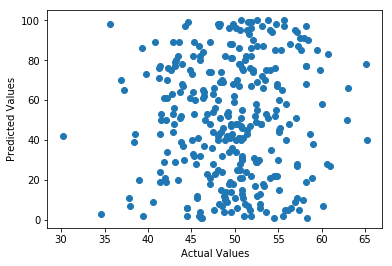

In [48]:
multiTrendPredictionsOnTest = multiTrend.predict(X_test)
plt.scatter(multiTrendPredictionsOnTest, y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

** Backward elimination will be used to arrive at a least-squares multilinear regression model on a train-test split of 0.8/0.2 **

** We start with the full model (i.e. with all audio features) ** 

In [12]:
allX = pd.DataFrame(data=d1, columns=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     325.9
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:37:38   Log-Likelihood:                -6089.8
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1263   BIC:                         1.227e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             17.5092      7.493      2.337      0.020       2.809      32.209
4             -1.8832      6.345     -0.297      0.767     -14.331      10.565
5              0.0318      0.028      1.120      0.263      -0.024       0.087
6            -17.1109      8.831     -1.938      0.053     -34.436       0.215
7              3.7569      4.501      0.835      0.404      -5.073      12.586
8            -23.4071     13.136     -1.782      0.075     -49.178       2.364
9              7.9885      2.267      3.524      0.000       3.541      12.436
10            -6.8851      6.443     -1.069      0.285     -19.525       5.755
11             0.2222      0.226      0.985      0.325      -0.220       0.665
12          2.324e-05   1.89e-05      1.232      0.218   -1.38e-05    6.03e-05
13            -1.2992      0.469     -2.772      0.006      -2.219      -0.380
14           -10.1126      4.384     -2.307      0.021     -18.714      -1.511
==============================================================================
Omnibus:                      589.920   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.131
Skew:                           0.024   Prob(JB):                     1.61e-15
Kurtosis:                       1.869   Cond. No.                     3.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** In ~10 runs of the above train-test split, feature 4 (liveness) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model. **

In [105]:
allX = pd.DataFrame(data=d1, columns=[3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     358.4
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:59:56   Log-Likelihood:                -6083.8
No. Observations:                1275   AIC:                         1.219e+04
Df Residuals:                    1264   BIC:                         1.225e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             16.1853      7.579      2.136      0.033       1.317      31.053
5              0.0283      0.028      1.010      0.313      -0.027       0.083
6            -12.7868      8.906     -1.436      0.151     -30.259       4.686
7              1.1814      4.589      0.257      0.797      -7.822      10.185
8             -2.6250     11.557     -0.227      0.820     -25.297      20.047
9              9.0269      2.333      3.870      0.000       4.451      13.603
10            -6.8991      6.460     -1.068      0.286     -19.573       5.775
11             0.0126      0.225      0.056      0.955      -0.429       0.454
12          4.611e-06   1.88e-05      0.245      0.807   -3.24e-05    4.16e-05
13            -1.3951      0.484     -2.885      0.004      -2.344      -0.446
14            -7.5315      4.418     -1.705      0.088     -16.199       1.136
==============================================================================
Omnibus:                      666.596   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.290
Skew:                           0.019   Prob(JB):                     5.45e-16
Kurtosis:                       1.850   Cond. No.                     3.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** In ~20 runs of the above train-test split, feature 11 (key) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model. **

In [104]:
allX = pd.DataFrame(data=d1, columns=[3, 5, 6, 7, 8, 9, 10, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     387.2
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:59:53   Log-Likelihood:                -6083.2
No. Observations:                1275   AIC:                         1.219e+04
Df Residuals:                    1265   BIC:                         1.224e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             17.3388      7.450      2.327      0.020       2.724      31.954
5              0.0224      0.028      0.800      0.424      -0.032       0.077
6            -15.1916      8.772     -1.732      0.084     -32.401       2.017
7              4.6800      4.478      1.045      0.296      -4.105      13.465
8            -11.6342     11.299     -1.030      0.303     -33.802      10.534
9              8.1874      2.276      3.597      0.000       3.721      12.653
10           -10.3950      6.395     -1.626      0.104     -22.940       2.150
12          2.303e-05   1.94e-05      1.190      0.234   -1.49e-05     6.1e-05
13            -1.2463      0.467     -2.667      0.008      -2.163      -0.329
14            -4.8495      4.343     -1.117      0.264     -13.370       3.671
==============================================================================
Omnibus:                      583.630   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.818
Skew:                           0.004   Prob(JB):                     1.88e-15
Kurtosis:                       1.870   Cond. No.                     3.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In ~20 runs of the above train-test split, feature 5 (tempo) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [68]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 7, 8, 9, 10, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     428.3
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:52:53   Log-Likelihood:                -6091.3
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1266   BIC:                         1.225e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             18.4663      7.412      2.491      0.013       3.925      33.008
6            -17.5651      8.902     -1.973      0.049     -35.029      -0.101
7             -0.0341      4.565     -0.007      0.994      -8.990       8.922
8            -21.7219     12.349     -1.759      0.079     -45.948       2.504
9              6.8669      2.179      3.151      0.002       2.591      11.142
10            -7.6075      6.523     -1.166      0.244     -20.404       5.189
12          4.198e-05   1.93e-05      2.176      0.030    4.13e-06    7.98e-05
13            -1.6773      0.468     -3.583      0.000      -2.596      -0.759
14            -5.1736      4.439     -1.166      0.244     -13.882       3.534
==============================================================================
Omnibus:                      579.621   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.747
Skew:                           0.017   Prob(JB):                     1.95e-15
Kurtosis:                       1.871   Cond. No.                     3.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In ~10 runs of the above train-test split, feature 7 (acousticness) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [108]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 8, 9, 10, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     474.8
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        20:01:12   Log-Likelihood:                -6099.3
No. Observations:                1275   AIC:                         1.221e+04
Df Residuals:                    1267   BIC:                         1.226e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             23.5612      7.011      3.361      0.001       9.807      37.316
6            -11.0298      8.729     -1.264      0.207     -28.155       6.095
8             -7.9816     11.362     -0.703      0.482     -30.271      14.308
9              7.6291      2.055      3.713      0.000       3.598      11.660
10            -8.8986      6.446     -1.381      0.168     -21.544       3.747
12          2.198e-05   1.93e-05      1.136      0.256    -1.6e-05    5.99e-05
13            -1.7957      0.460     -3.903      0.000      -2.698      -0.893
14            -9.7894      4.382     -2.234      0.026     -18.387      -1.192
==============================================================================
Omnibus:                      603.661   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.534
Skew:                           0.022   Prob(JB):                     1.31e-15
Kurtosis:                       1.865   Cond. No.                     3.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In ~10 runs of the above train-test split, feature 8 (instrumentalness) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [85]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 9, 10, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     558.5
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:56:13   Log-Likelihood:                -6092.7
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1268   BIC:                         1.224e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             20.0930      6.855      2.931      0.003       6.645      33.541
6             -9.9723      8.854     -1.126      0.260     -27.342       7.397
9              8.2547      2.016      4.096      0.000       4.301      12.209
10            -8.9452      6.252     -1.431      0.153     -21.210       3.320
12          1.437e-05   1.86e-05      0.773      0.440   -2.21e-05    5.08e-05
13            -1.8404      0.440     -4.179      0.000      -2.704      -0.976
14            -6.9219      4.289     -1.614      0.107     -15.337       1.493
==============================================================================
Omnibus:                      568.533   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.452
Skew:                           0.024   Prob(JB):                     2.25e-15
Kurtosis:                       1.874   Cond. No.                     2.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In ~10 runs of the above train-test split, feature 12 (duration) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [94]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 9, 10, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     637.9
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:57:34   Log-Likelihood:                -6096.1
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1269   BIC:                         1.224e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             21.8485      6.865      3.183      0.001       8.381      35.316
6            -14.8924      8.630     -1.726      0.085     -31.823       2.038
9              9.5817      1.854      5.167      0.000       5.944      13.219
10            -9.3553      6.243     -1.498      0.134     -21.603       2.893
13            -1.5706      0.434     -3.618      0.000      -2.422      -0.719
14            -9.3177      4.390     -2.123      0.034     -17.930      -0.706
==============================================================================
Omnibus:                      536.468   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.350
Skew:                           0.022   Prob(JB):                     3.91e-15
Kurtosis:                       1.883   Cond. No.                         80.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**In ~10 runs of the above train-test split, feature 10 (danceability) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [102]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 9, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     796.6
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:58:41   Log-Likelihood:                -6095.6
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1270   BIC:                         1.223e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             17.4698      6.711      2.603      0.009       4.304      30.636
6            -14.3865      8.678     -1.658      0.098     -31.410       2.638
9              9.1091      1.607      5.667      0.000       5.955      12.263
13            -1.4787      0.432     -3.419      0.001      -2.327      -0.630
14            -8.6010      3.926     -2.191      0.029     -16.303      -0.899
==============================================================================
Omnibus:                      628.706   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.170
Skew:                           0.001   Prob(JB):                     9.55e-16
Kurtosis:                       1.859   Cond. No.                         80.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**In ~10 runs of the above train-test split, feature 6 (speechiness) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [103]:
allX = pd.DataFrame(data=d1, columns=[3, 9, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     969.9
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:59:19   Log-Likelihood:                -6098.9
No. Observations:                1275   AIC:                         1.221e+04
Df Residuals:                    1271   BIC:                         1.223e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             21.9235      6.870      3.191      0.001       8.446      35.401
9              7.8373      1.679      4.667      0.000       4.543      11.132
13            -1.6381      0.465     -3.523      0.000      -2.550      -0.726
14           -10.1402      3.845     -2.637      0.008     -17.683      -2.597
==============================================================================
Omnibus:                      623.498   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.084
Skew:                           0.018   Prob(JB):                     9.97e-16
Kurtosis:                       1.860   Cond. No.                         64.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**All features now have p-values below the widely-accepted threshold of 0.05.**

**Our initial model therefore includes energy, time signature, loudness, and valence. The predictive value of our model will now be visualized ** 

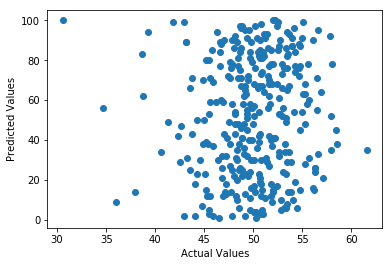

In [120]:
allX = pd.DataFrame(data=d1, columns=[3, 9, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()

predictionsOnTest = model.predict(x_test)
plt.scatter(predictionsOnTest, y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

**On another split with the same train-test ratio:**

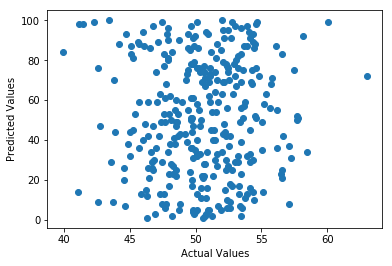

In [141]:
x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()

predictionsOnTest = model.predict(x_test)
plt.scatter(predictionsOnTest, y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

** Due to concern about multicollinearity, we will explore the relationship between a few features that we believe could be strongly correlated. **

**As a reminder:**
* col 0 = index
* col 1 = rank in year
* col 2 = year
* col 3 = energy
* col 4 = liveness
* col 5 = tempo
* col 6 = speechiness 
* col 7 = acousticness
* col 8 = instrumentalness
* col 9 = time sig
* col 10 = danceability
* col 11 = key
* col 12 = duration
* col 13 = loudness
* col 14 = valence

In [11]:
danceability = pd.DataFrame(data=d1, columns=[10]) 
energy = pd.DataFrame(data=d1, columns=[3]) 

X_train, X_test, y_train, y_test = train_test_split(danceability, energy, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      3   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:25:54   Log-Likelihood:                 93.792
No. Observations:                1275   AIC:                            -185.6
Df Residuals:                    1274   BIC:                            -180.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
10             1.0122      0.010    106.530      0.000       0.994       1.031
==============================================================================
Omnibus:                       17.010   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.576
Skew:                          -0.028   Prob(JB):                      0.00505
Kurtosis:                       2.557   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**An extremely high R^2 value, and an extremely low p-value! Energy and danceability are collinear.**

**We will repeat this with energy & valence.**

In [12]:
valence = pd.DataFrame(data=d1, columns=[14]) 
energy = pd.DataFrame(data=d1, columns=[3]) 

X_train, X_test, y_train, y_test = train_test_split(valence, energy, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      3   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     8091.
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                -93.409
No. Observations:                1275   AIC:                             188.8
Df Residuals:                    1274   BIC:                             194.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
14             1.1186      0.012     89.952      0.000       1.094       1.143
==============================================================================
Omnibus:                       16.597   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.297
Skew:                          -0.001   Prob(JB):                      0.00581
Kurtosis:                       2.560   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Again, an extremely high R^2 value, and an extremely low p-value. Energy & valence are collinear.**

**We will repeat this with energy & loudness.**

In [12]:
loudness = pd.DataFrame(data=d1, columns=[13]) 
energy = pd.DataFrame(data=d1, columns=[3])  

X_train, X_test, y_train, y_test = train_test_split(loudness, energy, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      3   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     3498.
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        09:02:45   Log-Likelihood:                -525.53
No. Observations:                1275   AIC:                             1053.
Df Residuals:                    1274   BIC:                             1058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
13            -0.0971      0.002    -59.142      0.000      -0.100      -0.094
==============================================================================
Omnibus:                      188.529   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.970
Skew:                          -0.960   Prob(JB):                     4.03e-69
Kurtosis:                       4.497   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Again, an extremely high R^2 value, and an extremely low p-value. Energy & loudness are collinear.**

**Now to assess the relationship between energy & tempo...**

In [13]:
tempo = pd.DataFrame(data=d1, columns=[5]) 
energy = pd.DataFrame(data=d1, columns=[3])  

X_train, X_test, y_train, y_test = train_test_split(tempo, energy, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      3   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.272e+04
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        09:02:47   Log-Likelihood:                 160.08
No. Observations:                1275   AIC:                            -318.2
Df Residuals:                    1274   BIC:                            -313.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
5              0.0054   4.78e-05    112.798      0.000       0.005       0.005
==============================================================================
Omnibus:                       66.621   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.211
Skew:                          -0.570   Prob(JB):                     2.83e-17
Kurtosis:                       3.370   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The highest R^2 value we've seen thus far! Energy & tempo are collinear.**

**This has important implications as our initial model included energy, time signature, loudness, & valence -- 3 out of 4 of which we just revealed to be collinear. Let's also check the relationship between energy & time signature -- we do not expect to see collinearity, but we may find another collinear relationship.**

In [14]:
timesignature = pd.DataFrame(data=d1, columns=[9]) 
energy = pd.DataFrame(data=d1, columns=[3])  

X_train, X_test, y_train, y_test = train_test_split(timesignature, energy, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      3   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 2.246e+04
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        09:02:48   Log-Likelihood:                 495.72
No. Observations:                1275   AIC:                            -989.4
Df Residuals:                    1274   BIC:                            -984.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
9              0.1727      0.001    149.850      0.000       0.170       0.175
==============================================================================
Omnibus:                       51.927   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.413
Skew:                          -0.499   Prob(JB):                     3.41e-13
Kurtosis:                       3.293   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**This is the highest R^2 value we have seen thus far. This raises a serious issue with our model: we have selected features that are all highly collinear.**

**Taking a step back, we will use single least-squares regression to find the single feature that is the best predictor of rank.**

In [71]:
rank = pd.DataFrame(data=d1, columns=[1])  

for i in range(3, 15):
    feature = pd.DataFrame(data=d1, columns=[i]) 
    X_train, X_test, y_train, y_test = train_test_split(feature, rank, test_size=0.2)
    model = sm.OLS(y_train, X_train).fit()
    print i," has r^2 value ",model.rsquared

3  has r^2 value  0.711665232415
4  has r^2 value  0.475771858889
5  has r^2 value  0.71526068896
6  has r^2 value  0.372759786227
7  has r^2 value  0.304153404639
8  has r^2 value  0.0120639931271
9  has r^2 value  0.746104077295
10  has r^2 value  0.701915755589
11  has r^2 value  0.526364156288
12  has r^2 value  0.731130229822
13  has r^2 value  0.666292712096
14  has r^2 value  0.613739854464


**After running the above code segment multiple times, it appears that time signature is the single best predictor of rank.**

**Let's see what it is collinear with: **

In [73]:
timesignature = pd.DataFrame(data=d1, columns=[9])  

for i in range(3, 15):
    feature = pd.DataFrame(data=d1, columns=[i]) 
    X_train, X_test, y_train, y_test = train_test_split(feature, timesignature, test_size=0.2)
    model = sm.OLS(y_train, X_train).fit()
    print i," has r^2 value ",model.rsquared

3  has r^2 value  0.946221476899
4  has r^2 value  0.628403404594
5  has r^2 value  0.941932681675
6  has r^2 value  0.524248121775
7  has r^2 value  0.384013893748
8  has r^2 value  0.0175744021279
9  has r^2 value  1.0
10  has r^2 value  0.952237610705
11  has r^2 value  0.675640196448
12  has r^2 value  0.965731126383
13  has r^2 value  0.852519662296
14  has r^2 value  0.854654546098


**Time signature is highly collinear with energy, tempo, danceability, duration. To a lesser extent, it is strongly collinear with loudness and valence.**

**Sources consulted: **
* Least squares modeling: https://medium.com/@rob3hr/lost-when-it-comes-to-multi-linear-regression-988785c3fa55
* Train-test split: Lab 4 & https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 
* Backward elimination: https://www.ndsu.edu/faculty/horsley/Stepwise_regression_(HZAU).pdf 
* Capturing multicollinearity: https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels 